In [3]:
# pip install missingno

# 필요한 모듈 임포트

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# plt 테마 설정: seaborn
plt.style.use('seaborn')
sns.set(font_scale=2.5)
warnings.filterwarnings('ignore')
%matplotlib inline

# 데이터셋 불러오기

In [5]:
# train
train = pd.read_csv('titanic/train.csv')
# test
test = pd.read_csv('titanic/test.csv')

# 탐색적 자료 분석

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId : 승객 번호  
Survived : 생존여부(1: 생존, 0 : 사망)  
Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)  
Name : 승객 이름  
Sex : 승객 성별  
Age : 승객 나이  
SibSp : 동반한 형제자매, 배우자 수  
Parch : 동반한 부모, 자식 수  
Ticket : 티켓의 고유 넘버  
Fare : 티켓의 요금  
Cabin : 객실 번호  
Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)  

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.shape

(891, 12)

In [12]:
# 생존 여부가 없다
test.shape

(418, 11)

# 결측치 처리

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
def nan_prop(data):
    for col in data.columns:
        is_null_sum = data[col].isnull().sum()
        col_total_row = data[col].shape[0]
        is_null_prop = 100 * (is_null_sum / col_total_row)
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}'.format(col, is_null_prop)
        print(msg)

In [17]:
nan_prop(train)

column: PassengerId	 Percent of NaN value: 0.00
column:   Survived	 Percent of NaN value: 0.00
column:     Pclass	 Percent of NaN value: 0.00
column:       Name	 Percent of NaN value: 0.00
column:        Sex	 Percent of NaN value: 0.00
column:        Age	 Percent of NaN value: 19.87
column:      SibSp	 Percent of NaN value: 0.00
column:      Parch	 Percent of NaN value: 0.00
column:     Ticket	 Percent of NaN value: 0.00
column:       Fare	 Percent of NaN value: 0.00
column:      Cabin	 Percent of NaN value: 77.10
column:   Embarked	 Percent of NaN value: 0.22


In [19]:
nan_prop(test)

column: PassengerId	 Percent of NaN value: 0.00
column:     Pclass	 Percent of NaN value: 0.00
column:       Name	 Percent of NaN value: 0.00
column:        Sex	 Percent of NaN value: 0.00
column:        Age	 Percent of NaN value: 20.57
column:      SibSp	 Percent of NaN value: 0.00
column:      Parch	 Percent of NaN value: 0.00
column:     Ticket	 Percent of NaN value: 0.00
column:       Fare	 Percent of NaN value: 0.24
column:      Cabin	 Percent of NaN value: 78.23
column:   Embarked	 Percent of NaN value: 0.00


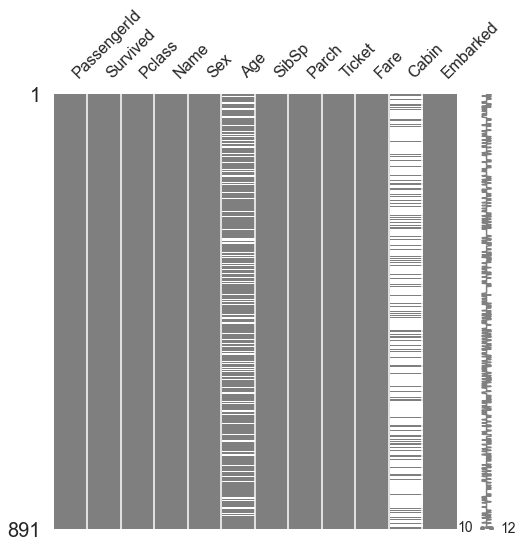

In [28]:
msno.matrix(df=train, figsize=(8,8), color=(0.5,0.5,0.5))

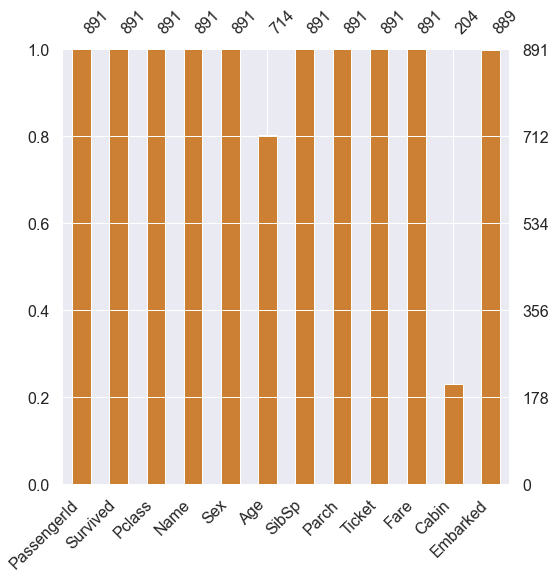

In [29]:
msno.bar(df=train, figsize=(8,8), color=(0.8,0.5,0.2), col)

# 범주형 feature 확인

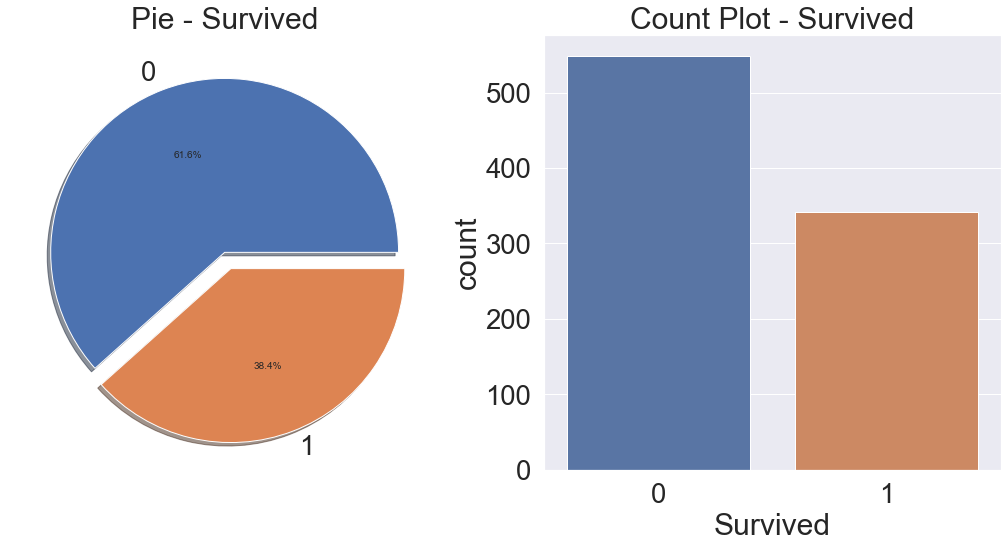

In [31]:
f, ax = plt.subplots(1,2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(
    explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True
)
ax[0].set_title('Pie - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')
plt.show()

In [39]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

# 생사 - 성별

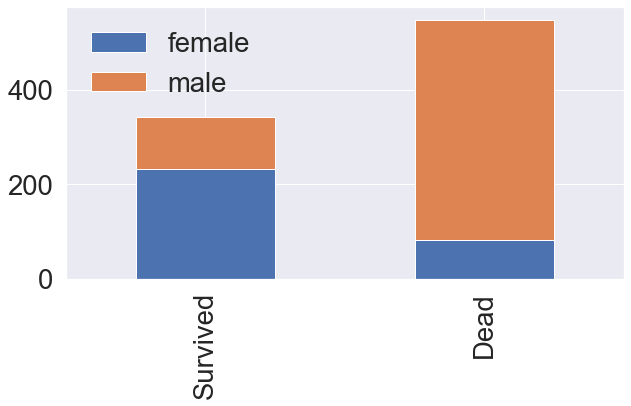

In [40]:
bar_chart('Sex')

# 생사 - 승선권 클래스

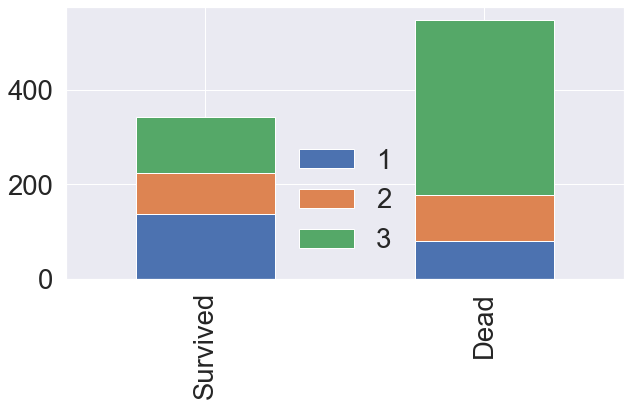

In [41]:
bar_chart('Pclass')

# 생사 - 동반한 형제자매, 배우자 수

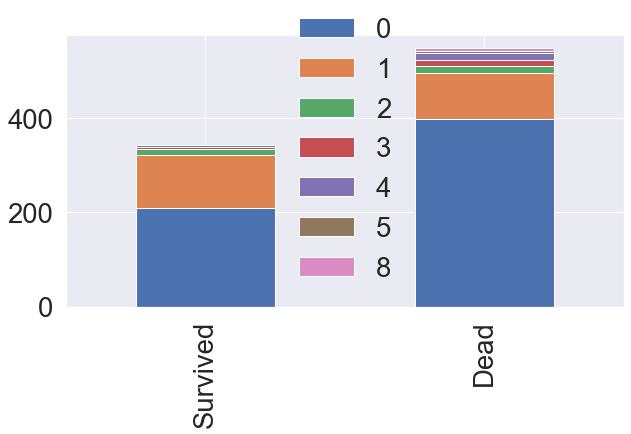

In [43]:
bar_chart('SibSp')

# 생사 - 동반한 부모, 자식 수

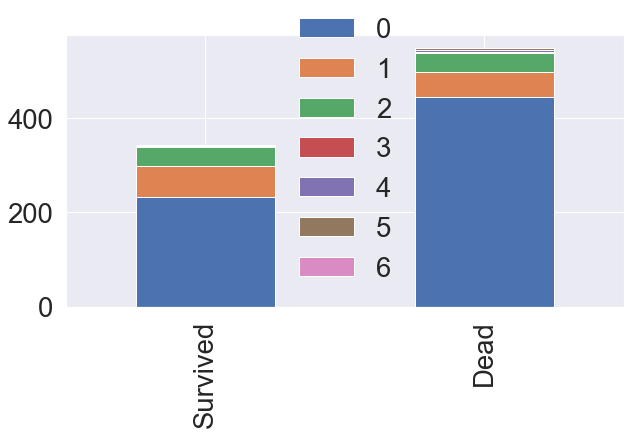

In [44]:
bar_chart('Parch')

# 생사 - 승선 선착장

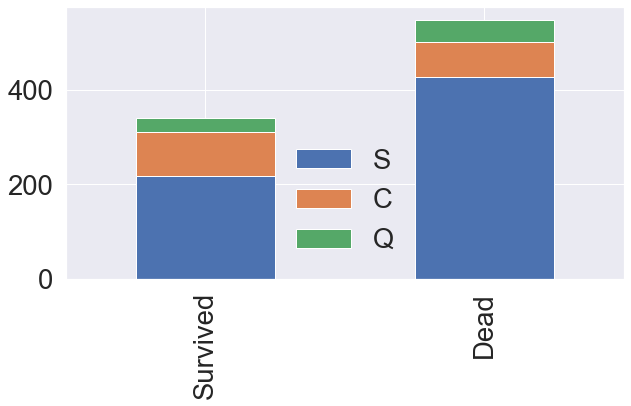

In [45]:
bar_chart('Embarked')

# 그외

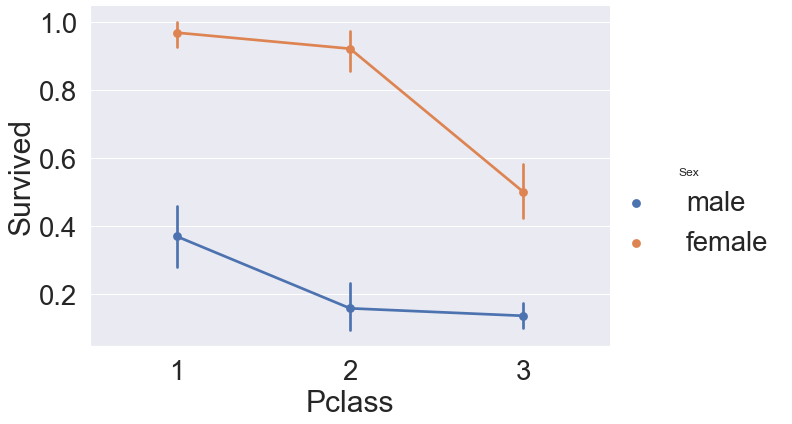

In [46]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, 
               size=6, aspect=1.5)

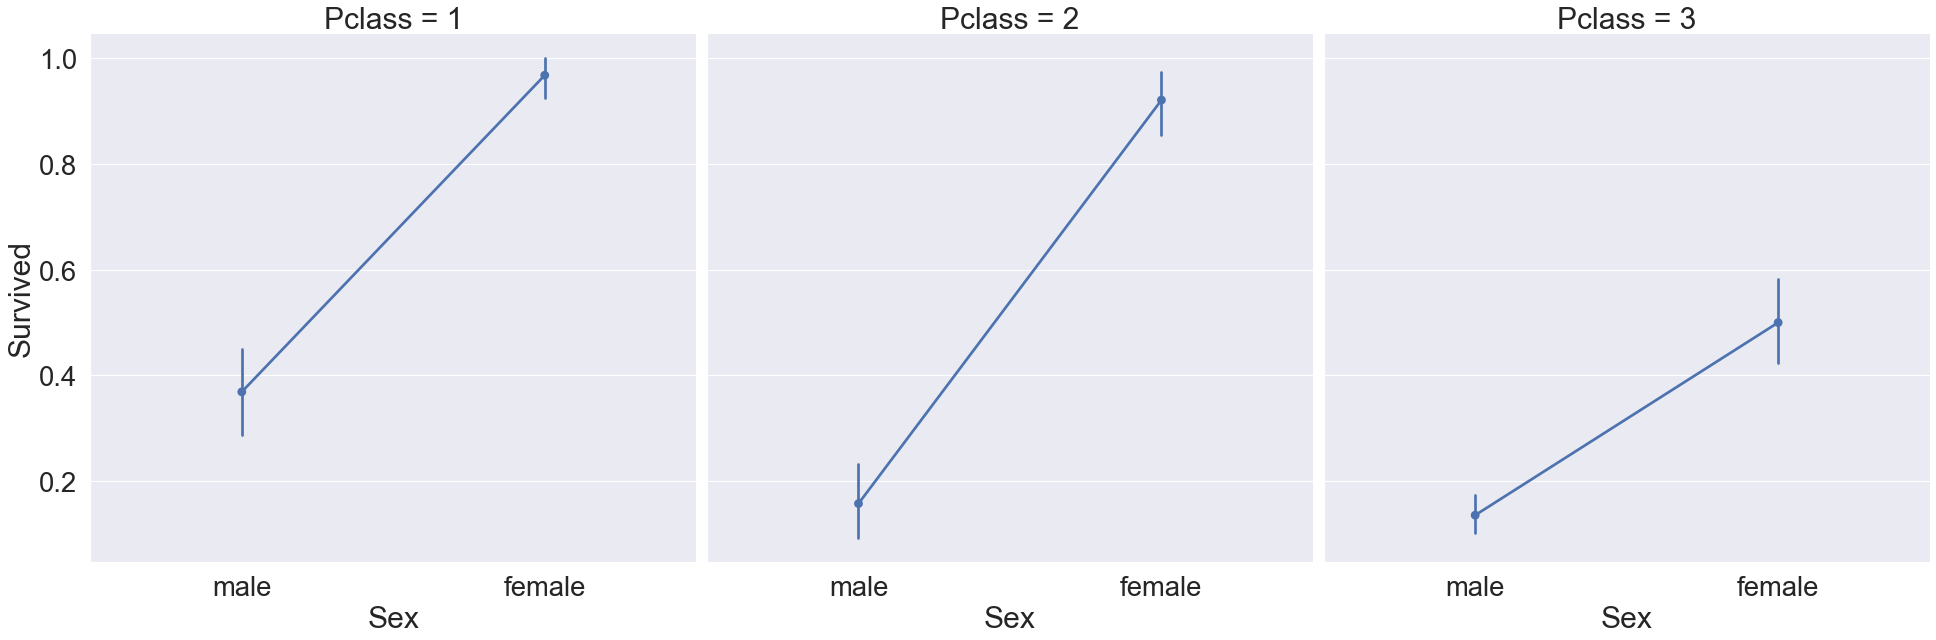

In [47]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=train,
              satureation=.5, size=9, aspect=1)

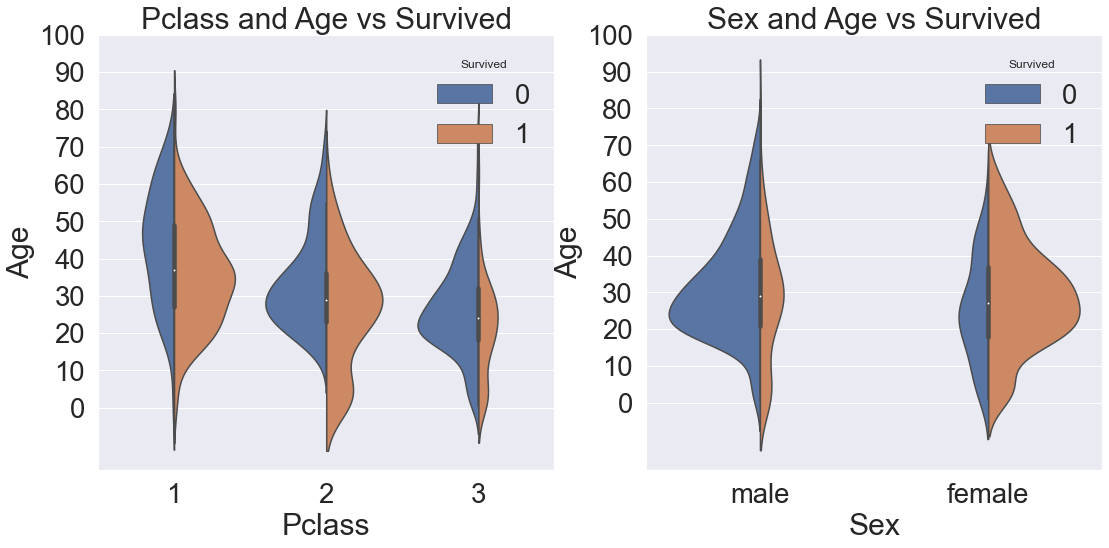

In [48]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", 
               data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", 
               data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# 명목형 변수 수치로 변환

## 이름 => 호칭 => 수치

In [49]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [50]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Lady          1
Countess      1
Jonkheer      1
Capt          1
Ms            1
Don           1
Mme           1
Name: Title, dtype: int64

In [51]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [52]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 
                 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 
                 'Capt': 3, 'Sir': 3, 'Don': 3, 'Mme':3, 
                 'Jonkheer': 3, 'Countess': 3 }

In [53]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

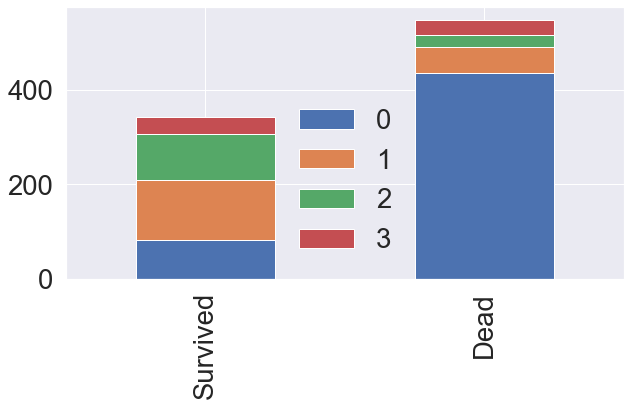

In [55]:
bar_chart('Title')

In [56]:
train. drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

## 성별 => 수치

In [57]:
sex_mapping = {"male": 0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

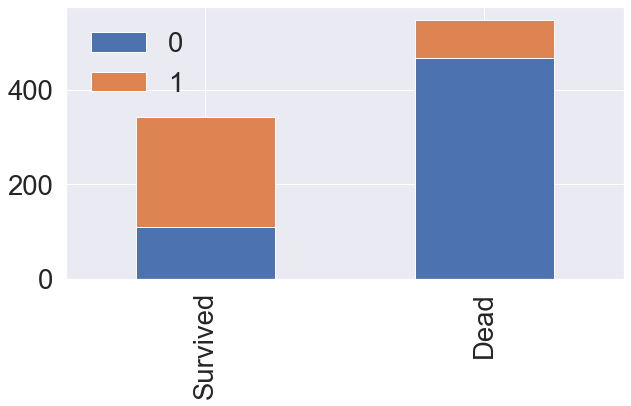

In [58]:
bar_chart('Sex')

# 나이 결측치 처리

## Title 그룹별로 중간값을 구하여 결측치를 채운다.

In [59]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

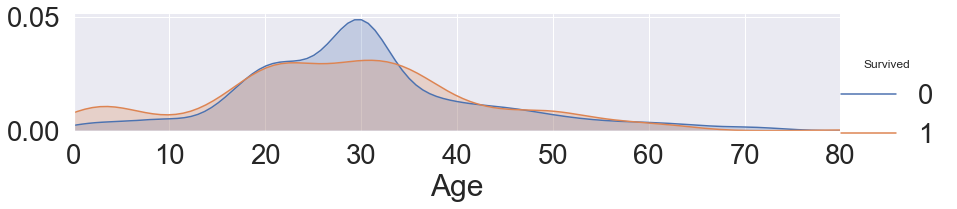

In [60]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

(20.0, 30.0)

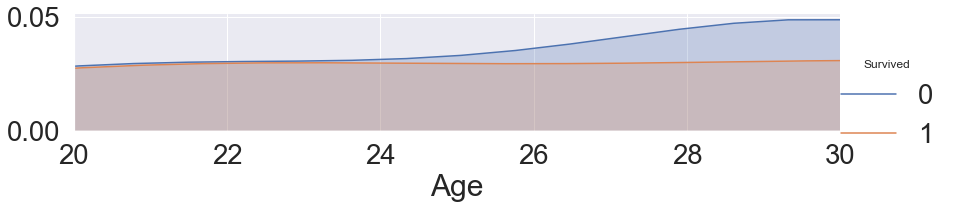

In [61]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

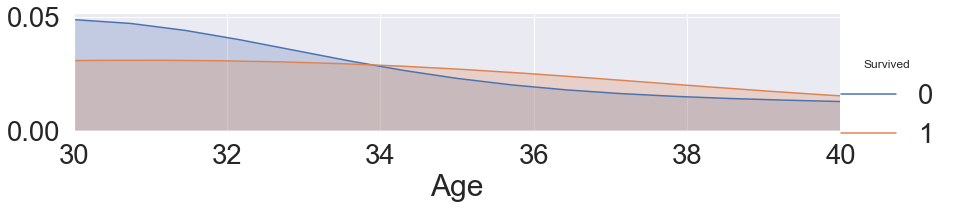

In [62]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 60.0)

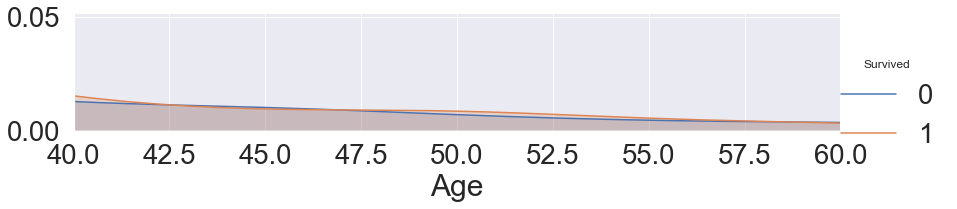

In [63]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

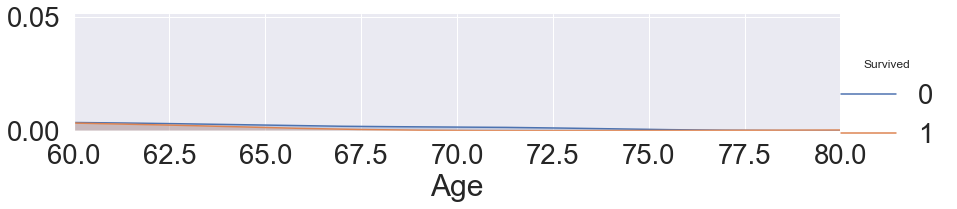

In [64]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [65]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


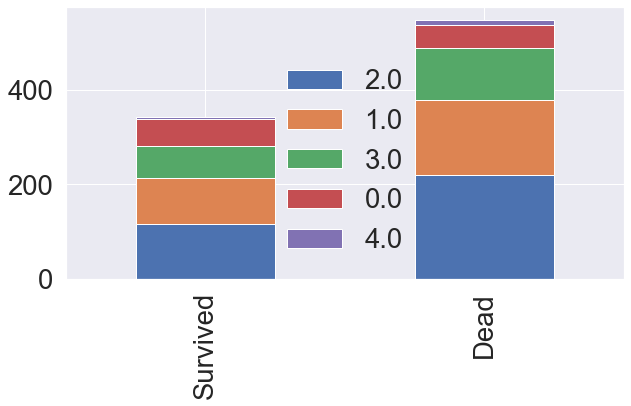

In [66]:
bar_chart('Age')